# Data Cleaning Notebook

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

#### Set up plotting aesthetics

In [60]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

#### Load the data

In [61]:
data_path = Path("../data/listings.csv")  # adjust if needed
df = pd.read_csv(data_path)

#### Preview the data

In [62]:
print("Shape:", df.shape)
df.head()

Shape: (7281, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,95.0,2,126,2019-10-03,0.78,2,116,0,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,105.0,2,78,2024-10-09,0.48,3,167,12,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,140.0,4,115,2024-08-18,0.70,1,19,4,NaN
3,159634,"Fancy, bright central roof top flat and homeof...",765694,Susana,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,NaN,4,44,2024-12-21,0.27,1,3,7,NaN
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,70.0,3,573,2024-12-11,3.55,1,156,27,NaN


#### Keep relevant columns

In [63]:
keep_cols = [
    "id", "name", "neighbourhood", "latitude", "longitude", "room_type",
    "price", "minimum_nights", "availability_365", "number_of_reviews",
    "last_review",
]
df = df[keep_cols]

#### Convert price to numeric (remove $/€/comma and convert to float)

In [64]:
df['price'] = df['price'].replace('[$,€]', '', regex=True).astype(float)

#### Drop rows with missing or 0 prices

In [65]:
df = df[df['price'] > 0]

#### Convert date columns

In [66]:
df['last_review'] = pd.to_datetime(df['last_review'])

#### Save cleaned version (optional)

In [67]:
df.to_csv("../data/listings_cleaned.csv", index=False)

#### Simple price distribution plot

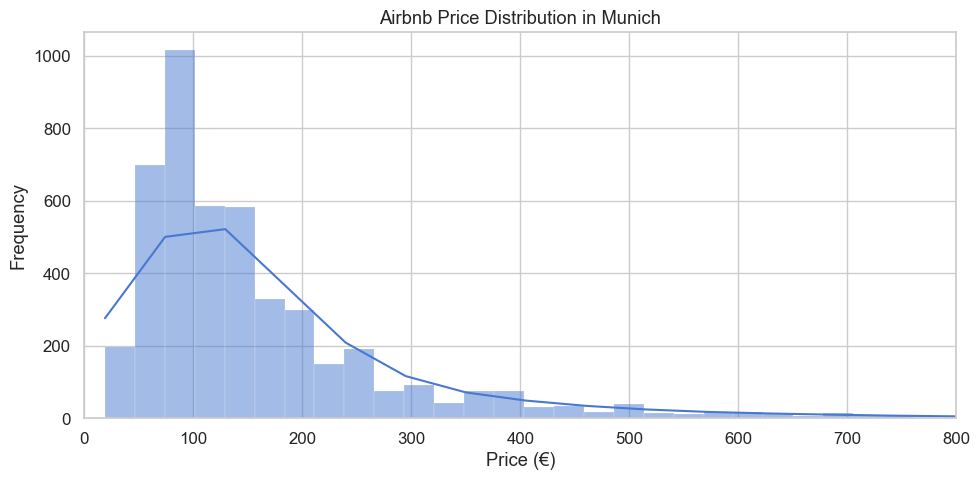

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=400, kde=True)
plt.xlim(0, 800)  # limit to avoid extreme outliers
plt.title("Airbnb Price Distribution in Munich")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Look at data from my own neighbourhood

In [72]:
df['neighbourhood'].unique()

array(['Hadern', 'Berg am Laim', 'Maxvorstadt', 'Sendling-Westpark',
       'Neuhausen-Nymphenburg', 'Schwanthalerhöhe', 'Au-Haidhausen',
       'Ludwigsvorstadt-Isarvorstadt', 'Schwabing-West',
       'Ramersdorf-Perlach', 'Untergiesing-Harlaching', 'Obergiesing',
       'Schwabing-Freimann', 'Tudering-Riem', 'Bogenhausen',
       'Feldmoching-Hasenbergl',
       'Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln',
       'Pasing-Obermenzing', 'Milbertshofen-Am Hart', 'Sendling', 'Laim',
       'Altstadt-Lehel', 'Moosach', 'Aubing-Lochhausen-Langwied',
       'Allach-Untermenzing'], dtype=object)

In [77]:
max(df[df['neighbourhood'] == 'Obergiesing']['price'])

1200.0

In [78]:
df[(df['neighbourhood'] == 'Obergiesing') & (df['price'] == 1200)]

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review
281,3500931,Great flat for Oktoberfest - for couples or 4,Obergiesing,48.11622,11.5824,Entire home/apt,1200.0,28,364,13,2019-09-22


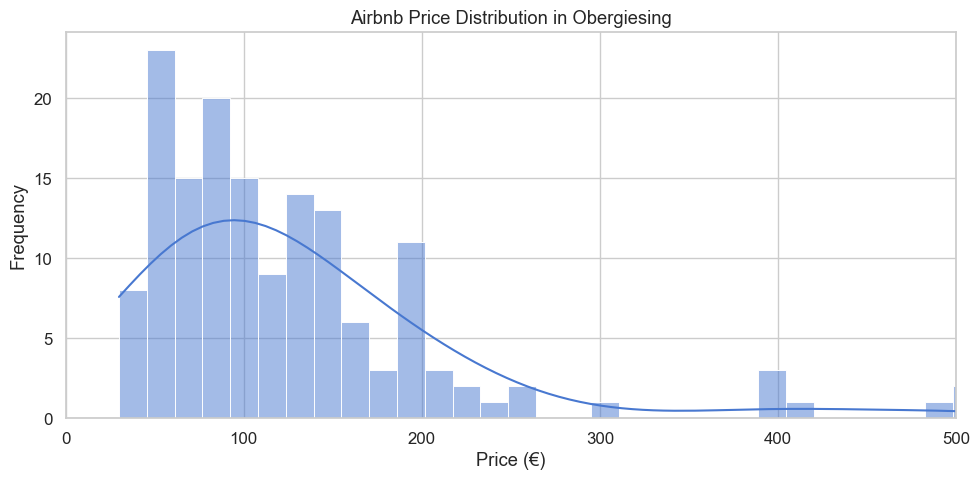

In [74]:
# Simple price distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df[df['neighbourhood'] == 'Obergiesing']['price'], bins=75, kde=True)
plt.xlim(0, 500)  # limit to avoid extreme outliers
plt.title("Airbnb Price Distribution in Obergiesing")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review
281,3500931,Great flat for Oktoberfest - for couples or 4,Obergiesing,48.11622,11.5824,Entire home/apt,1200.0,28,364,13,2019-09-22
